In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vietnam-war-bombing-operations/THOR_Vietnam_Aircraft_Glossary.csv
/kaggle/input/vietnam-war-bombing-operations/THOR_Vietnam_Bombing_Operations.csv
/kaggle/input/vietnam-war-bombing-operations/THOR_Vietnam_Weapons_Glossary.csv
/kaggle/input/vietnam-war-bombing-operations/thor_data_dictionary_2016.pdf


# Project Introduction

This project will have personal importance to me being from Vietnam and having developed strong academic interests on the War. In this notebook, I explore bombing in Vietnam from the THOR dataset.

In [2]:
#import necessary libraries - see requirements.txt for example
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#import necessary libraries and examining some of the data
ops_df = pd.read_csv('/kaggle/input/vietnam-war-bombing-operations/THOR_Vietnam_Bombing_Operations.csv')

ops_df.head(5) 

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (3,13,18,19,20,22,26,27,29,30,32,35,44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,THOR_DATA_VIET_ID,COUNTRYFLYINGMISSION,MILSERVICE,MSNDATE,SOURCEID,SOURCERECORD,VALID_AIRCRAFT_ROOT,TAKEOFFLOCATION,TGTLATDD_DDD_WGS84,TGTLONDDD_DDD_WGS84,...,GEOZONE,ID,MFUNC_DESC_CLASS,NUMWEAPONSJETTISONED,NUMWEAPONSRETURNED,RELEASEALTITUDE,RELEASEFLTSPEED,RESULTSBDA,TIMEOFFTARGET,WEAPONSLOADEDWEIGHT
0,351,UNITED STATES OF AMERICA,USAF,1971-06-05,647464,SEADAB,EC-47,TAN SON NHUT,NaN,NaN,...,NaN,27135863,NONKINETIC,-1,-1,NaN,NaN,NaN,1005.0,0
1,2,UNITED STATES OF AMERICA,USAF,1972-12-26,642778,SEADAB,EC-47,NAKHON PHANOM,NaN,NaN,...,NaN,27131177,NONKINETIC,-1,-1,NaN,NaN,NaN,530.0,0
2,3,UNITED STATES OF AMERICA,USAF,1973-07-28,642779,SEADAB,RF-4,UDORN AB,NaN,NaN,...,NaN,27131178,NONKINETIC,-1,-1,NaN,NaN,NaN,730.0,0
3,4,UNITED STATES OF AMERICA,USAF,1970-02-02,642780,SEADAB,A-1,NAKHON PHANOM,16.902500,106.014166,...,XE,27131179,KINETIC,-1,-1,NaN,NaN,SECONDARY FIRE,1415.0,17400
4,5,VIETNAM (SOUTH),VNAF,1970-10-08,642781,SEADAB,A-37,DANANG,14.945555,108.257222,...,ZB,27131180,KINETIC,-1,-1,NaN,NaN,RNO WEATHER,1240.0,0


In [4]:
ops_df.describe()

,THOR_DATA_VIET_ID,SOURCEID,TGTLATDD_DDD_WGS84,TGTLONDDD_DDD_WGS84,NUMWEAPONSDELIVERED,TIMEONTARGET,WEAPONTYPECLASS,WEAPONTYPEWEIGHT,FLTHOURS,NUMOFACFT,ID,NUMWEAPONSJETTISONED,NUMWEAPONSRETURNED,RELEASEALTITUDE,RELEASEFLTSPEED,TIMEOFFTARGET,WEAPONSLOADEDWEIGHT
count,4.670416e+06,4.670416e+06,3.540285e+06,3.540285e+06,4.670416e+06,4.643987e+06,0.0,4.670416e+06,4.670416e+06,4.670416e+06,4.670416e+06,4.670416e+06,4.670416e+06,3378.000000,1689.000000,4.643987e+06,4.670416e+06
mean,2.335210e+06,1.670536e+06,1.528508e+01,1.064661e+02,1.928545e+01,8.379309e+02,NaN,1.905497e+02,4.617050e+01,2.806638e+00,2.601907e+07,2.812269e+00,2.064294e+01,16.001184,16.690941,8.423983e+02,1.211223e+04
std,1.348233e+06,1.221026e+06,3.027058e+00,1.333049e+00,2.046930e+02,6.417968e+02,NaN,3.279982e+02,9.924953e+01,6.907836e+00,1.350858e+06,4.170609e+01,1.077888e+02,55.390749,24.607688,6.397708e+02,1.442535e+05
min,2.000000e+00,1.000000e+00,1.808991e-02,-3.856811e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,2.367286e+07,-1.000000e+00,-1.000000e+00,0.000000,0.000000,0.000000e+00,-1.000000e+00
25%,1.167606e+06,7.148380e+05,1.209714e+01,1.058431e+02,0.000000e+00,3.100000e+02,NaN,0.000000e+00,1.700000e+01,1.000000e+00,2.484960e+07,-1.000000e+00,-1.000000e+00,0.000000,0.000000,3.150000e+02,-1.000000e+00
50%,2.335210e+06,1.406362e+06,1.621284e+01,1.064856e+02,1.000000e+00,8.000000e+02,NaN,0.000000e+00,3.000000e+01,2.000000e+00,2.602017e+07,0.000000e+00,0.000000e+00,0.000000,0.000000,8.000000e+02,-1.000000e+00
75%,3.502813e+06,2.357423e+06,1.724400e+01,1.071808e+02,8.000000e+00,1.240000e+03,NaN,3.900000e+02,4.600000e+01,2.000000e+00,2.718908e+07,0.000000e+00,0.000000e+00,5.000000,32.000000,1.245000e+03,0.000000e+00
max,4.670417e+06,4.909001e+06,1.357177e+02,1.758500e+02,9.999000e+03,9.735000e+03,NaN,1.500000e+04,8.096000e+03,9.670000e+02,2.835669e+07,9.990000e+02,9.990000e+02,700.000000,88.000000,9.930000e+03,6.566560e+07


### Section 1: Breaking down by participation

My intuitive guess was to breakdown the data by participants (USA, DRV, LDPR, ROK and AUS). Here I group the data by the country to further explore their characteristics.

In [7]:
df_by_ctymssn = ops_df.groupby(by='COUNTRYFLYINGMISSION').sum()
df_by_ctymssn
#aggregate didn't return too much value besides total num of weapoins dropped; time spent, etc..

,THOR_DATA_VIET_ID,SOURCEID,TGTLATDD_DDD_WGS84,TGTLONDDD_DDD_WGS84,NUMWEAPONSDELIVERED,TIMEONTARGET,WEAPONTYPECLASS,WEAPONTYPEWEIGHT,FLTHOURS,NUMOFACFT,ID,NUMWEAPONSJETTISONED,NUMWEAPONSRETURNED,RELEASEALTITUDE,RELEASEFLTSPEED,TIMEOFFTARGET,WEAPONSLOADEDWEIGHT
COUNTRYFLYINGMISSION,,,,,,,,,,,,,,,,,
AUSTRALIA,39395891353,11945762404,1.251554e+05,1.081916e+06,346391,1.258042e+07,0.0,432274,300411,30355,348719210540,-12714,-12714,60.0,0.0,1.258042e+07,198927160
KOREA (SOUTH),75935288970,22884800533,9.477648e+03,8.498381e+04,206341,9.008800e+06,0.0,52782,2958887,131537,671055908253,-24470,-24470,0.0,0.0,9.008800e+06,35645300
LAOS,101384496547,30552060360,5.361757e+05,3.175675e+06,979818,3.302804e+07,0.0,138008,150626,616041,898815148507,-32779,-32779,0.0,0.0,3.302804e+07,398959150
UNITED STATES OF AMERICA,8874937371553,6983337813088,4.999440e+07,3.417480e+08,74274908,3.395285e+09,0.0,834596268,169984167,9050472,102414391882846,13129123,92331023,20925.0,9115.0,3.413469e+09,49881438200
VIETNAM (SOUTH),1803659599615,749971495663,3.448028e+06,3.082723e+07,13908484,4.411310e+08,0.0,54726261,42227382,3273893,17087793798313,78913,4153650,1533.0,80.0,4.436934e+08,6053453170


In [8]:
df_by_ctymssn['Mission Count'] = ops_df['COUNTRYFLYINGMISSION'].value_counts()
df_by_ctymssn
# counting entries of each country to see their total logs

,THOR_DATA_VIET_ID,SOURCEID,TGTLATDD_DDD_WGS84,TGTLONDDD_DDD_WGS84,NUMWEAPONSDELIVERED,TIMEONTARGET,WEAPONTYPECLASS,WEAPONTYPEWEIGHT,FLTHOURS,NUMOFACFT,ID,NUMWEAPONSJETTISONED,NUMWEAPONSRETURNED,RELEASEALTITUDE,RELEASEFLTSPEED,TIMEOFFTARGET,WEAPONSLOADEDWEIGHT,Mission Count
COUNTRYFLYINGMISSION,,,,,,,,,,,,,,,,,,
AUSTRALIA,39395891353,11945762404,1.251554e+05,1.081916e+06,346391,1.258042e+07,0.0,432274,300411,30355,348719210540,-12714,-12714,60.0,0.0,1.258042e+07,198927160,12714
KOREA (SOUTH),75935288970,22884800533,9.477648e+03,8.498381e+04,206341,9.008800e+06,0.0,52782,2958887,131537,671055908253,-24470,-24470,0.0,0.0,9.008800e+06,35645300,24470
LAOS,101384496547,30552060360,5.361757e+05,3.175675e+06,979818,3.302804e+07,0.0,138008,150626,616041,898815148507,-32779,-32779,0.0,0.0,3.302804e+07,398959150,32779
UNITED STATES OF AMERICA,8874937371553,6983337813088,4.999440e+07,3.417480e+08,74274908,3.395285e+09,0.0,834596268,169984167,9050472,102414391882846,13129123,92331023,20925.0,9115.0,3.413469e+09,49881438200,3962121
VIETNAM (SOUTH),1803659599615,749971495663,3.448028e+06,3.082723e+07,13908484,4.411310e+08,0.0,54726261,42227382,3273893,17087793798313,78913,4153650,1533.0,80.0,4.436934e+08,6053453170,634717


In [9]:
df_by_ctymssn['Country Abbr'] = ['AUS', 'ROK', 'LAO', 'USA', 'DRV'] #for brevity

<AxesSubplot:xlabel='Country Abbr', ylabel='Mission Count'>

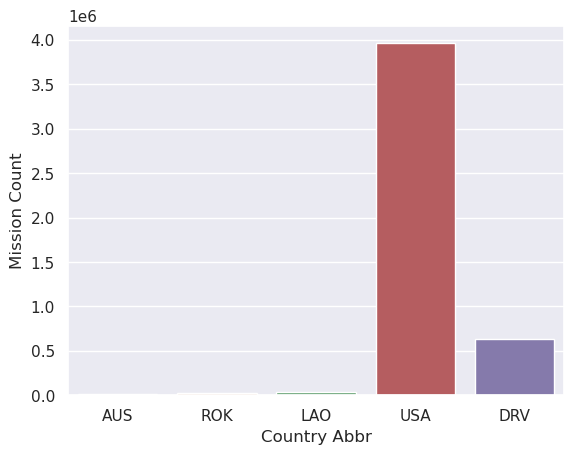

In [10]:
sns.set() 
sns.barplot(data=df_by_ctymssn, x='Country Abbr', y='Mission Count')

COUNTRYFLYINGMISSION
AUSTRALIA                    0.0
KOREA (SOUTH)                0.0
LAOS                         1.0
UNITED STATES OF AMERICA    83.0
VIETNAM (SOUTH)             16.0
Name: NUMWEAPONSDELIVERED, dtype: float64


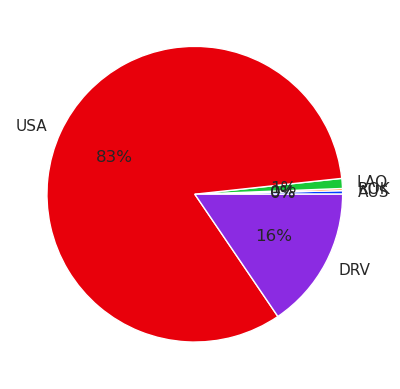

In [11]:
perct_weapons_by_country = (round(df_by_ctymssn['NUMWEAPONSDELIVERED'] / df_by_ctymssn['NUMWEAPONSDELIVERED'].sum() * 100,0)) 
print(perct_weapons_by_country)
colors = sns.color_palette('bright')[0:5]

sns.set() 
plt.pie(df_by_ctymssn['NUMWEAPONSDELIVERED'], labels=df_by_ctymssn['Country Abbr'], colors=colors, autopct='%.0f%%')
plt.show()

** Observation at this point** 
Total count by countries might not yield the most insight as the USA and the DRV dominates being the keystakeholder.

In [71]:
ops_df.MFUNC_DESC_CLASS.value_counts()

mission_sum = ops_df.MFUNC_DESC_CLASS.value_counts().sum()

kinetic_prct = (ops_df.MFUNC_DESC_CLASS == 'KINETIC').value_counts() / mission_sum

nonkinetic_prct = (ops_df.MFUNC_DESC_CLASS == 'NONKINETIC').value_counts() / mission_sum

kinetic_prct, nonkinetic_prct

(True     0.683475
 False    0.316525
 Name: MFUNC_DESC_CLASS, dtype: float64,
 False    0.683475
 True     0.316525
 Name: MFUNC_DESC_CLASS, dtype: float64)

In [12]:
kinetic_mission = ops_df[ops_df.MFUNC_DESC_CLASS == 'KINETIC'].MFUNC_DESC.value_counts()
kinetic_mission

#group patrol missions; SPPT/SUPPORT Mission; strike; other *armed*; others

STRIKE                  1007674
CLOSE AIR SUPPORT        850726
AIR INTERDICTION         454388
ARMED RECCE              418330
DIRECT AIR SUPPORT       320026
FLAK SUPPRESSION          35564
LANDING ZONE PREP         25792
BAS CMBT AIR  PATROL      25196
ARMED HELICOPTER          20353
MIG CMBT AIR PATROL       13007
RES CMBT AIR PATROL        9340
AERIAL MINING              5945
SAR CMBT AIR PATROL        3874
DIR AIR SUPPT              1017
LLLTV STRIKE                880
Name: MFUNC_DESC, dtype: int64

In [72]:
nonkinetic_mission = ops_df[ops_df.MFUNC_DESC_CLASS == 'NONKINETIC'].MFUNC_DESC.value_counts()
nonkinetic_mission ## this is too cool - will delve into this later

PHOTO RECCE           303210
TRAINING               98821
ESCORT/COVER           63948
VISUAL RECCE           61348
MAINTENANCE            61022
                       ...  
SPECTROMETER RECCE        22
TELLERLIGHT RECCE         18
CBT CGO AIRLAND            4
LAPES EXTR                 3
MOVIE RECON                1
Name: MFUNC_DESC, Length: 80, dtype: int64

### Section 2: Chronological Involvement 

Because the analysis above didn't yield a huge number of values in terms of progression over time - I look at this here.

In [13]:
import datetime
ops_df.shape #import datetime for time transformation purposes

(4670416, 47)

In [14]:
ops_df['MSNDATE'].dtype #mission date is object - we need datetime

dtype('O')

In [15]:
#ops_df[ops_df['MSNDATE'].isna()]

ops_df_date = ops_df[pd.notnull(ops_df['MSNDATE'])]
ops_df_date #drop entries with a null date. 

,THOR_DATA_VIET_ID,COUNTRYFLYINGMISSION,MILSERVICE,MSNDATE,SOURCEID,SOURCERECORD,VALID_AIRCRAFT_ROOT,TAKEOFFLOCATION,TGTLATDD_DDD_WGS84,TGTLONDDD_DDD_WGS84,...,GEOZONE,ID,MFUNC_DESC_CLASS,NUMWEAPONSJETTISONED,NUMWEAPONSRETURNED,RELEASEALTITUDE,RELEASEFLTSPEED,RESULTSBDA,TIMEOFFTARGET,WEAPONSLOADEDWEIGHT
0,351,UNITED STATES OF AMERICA,USAF,1971-06-05,647464,SEADAB,EC-47,TAN SON NHUT,NaN,NaN,...,NaN,27135863,NONKINETIC,-1,-1,NaN,NaN,NaN,1005.0,0
1,2,UNITED STATES OF AMERICA,USAF,1972-12-26,642778,SEADAB,EC-47,NAKHON PHANOM,NaN,NaN,...,NaN,27131177,NONKINETIC,-1,-1,NaN,NaN,NaN,530.0,0
2,3,UNITED STATES OF AMERICA,USAF,1973-07-28,642779,SEADAB,RF-4,UDORN AB,NaN,NaN,...,NaN,27131178,NONKINETIC,-1,-1,NaN,NaN,NaN,730.0,0
3,4,UNITED STATES OF AMERICA,USAF,1970-02-02,642780,SEADAB,A-1,NAKHON PHANOM,16.902500,106.014166,...,XE,27131179,KINETIC,-1,-1,NaN,NaN,SECONDARY FIRE,1415.0,17400
4,5,VIETNAM (SOUTH),VNAF,1970-10-08,642781,SEADAB,A-37,DANANG,14.945555,108.257222,...,ZB,27131180,KINETIC,-1,-1,NaN,NaN,RNO WEATHER,1240.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4670411,4651825,UNITED STATES OF AMERICA,USAF,1971-10-19,541658,SEADAB,F-4,DANANG,15.292777,107.137500,...,YB,27030057,KINETIC,-1,-1,NaN,NaN,NaN,725.0,82080
4670412,4651905,UNITED STATES OF AMERICA,USAF,1972-01-21,541738,SEADAB,AC-130,UBON AB,19.589166,103.438888,...,UG,27030137,KINETIC,-1,-1,NaN,NaN,NaN,1506.0,0
4670413,4651925,VIETNAM (SOUTH),VNAF,1971-07-01,541758,SEADAB,A-37,NHA TRANG,14.027222,109.156111,...,BR,27030157,KINETIC,-1,-1,NaN,NaN,DESTROYED,1000.0,17240
4670414,4652229,UNITED STATES OF AMERICA,USAF,1970-02-28,542062,SEADAB,UH-1,PHAN RANG,NaN,NaN,...,NaN,27030461,KINETIC,-1,-1,NaN,NaN,NaN,800.0,0


In [31]:
#df_date = pd.to_datetime(ops_df_date['MSNDATE'].str.strip('-'), format='%Y-%m-%d')


#df_date.dtype


#print(ops_df_date['MSNDATE'].str.split('-')[:40])

df_date = ops_df_date[ops_df_date["MSNDATE"].str.contains("-")==True] #dropping weirdly formatted date (e.g. YYYYMMDD)

df_date

,THOR_DATA_VIET_ID,COUNTRYFLYINGMISSION,MILSERVICE,MSNDATE,SOURCEID,SOURCERECORD,VALID_AIRCRAFT_ROOT,TAKEOFFLOCATION,TGTLATDD_DDD_WGS84,TGTLONDDD_DDD_WGS84,...,GEOZONE,ID,MFUNC_DESC_CLASS,NUMWEAPONSJETTISONED,NUMWEAPONSRETURNED,RELEASEALTITUDE,RELEASEFLTSPEED,RESULTSBDA,TIMEOFFTARGET,WEAPONSLOADEDWEIGHT
0,351,UNITED STATES OF AMERICA,USAF,1971-06-05,647464,SEADAB,EC-47,TAN SON NHUT,NaN,NaN,...,NaN,27135863,NONKINETIC,-1,-1,NaN,NaN,NaN,1005.0,0
1,2,UNITED STATES OF AMERICA,USAF,1972-12-26,642778,SEADAB,EC-47,NAKHON PHANOM,NaN,NaN,...,NaN,27131177,NONKINETIC,-1,-1,NaN,NaN,NaN,530.0,0
2,3,UNITED STATES OF AMERICA,USAF,1973-07-28,642779,SEADAB,RF-4,UDORN AB,NaN,NaN,...,NaN,27131178,NONKINETIC,-1,-1,NaN,NaN,NaN,730.0,0
3,4,UNITED STATES OF AMERICA,USAF,1970-02-02,642780,SEADAB,A-1,NAKHON PHANOM,16.902500,106.014166,...,XE,27131179,KINETIC,-1,-1,NaN,NaN,SECONDARY FIRE,1415.0,17400
4,5,VIETNAM (SOUTH),VNAF,1970-10-08,642781,SEADAB,A-37,DANANG,14.945555,108.257222,...,ZB,27131180,KINETIC,-1,-1,NaN,NaN,RNO WEATHER,1240.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4670411,4651825,UNITED STATES OF AMERICA,USAF,1971-10-19,541658,SEADAB,F-4,DANANG,15.292777,107.137500,...,YB,27030057,KINETIC,-1,-1,NaN,NaN,NaN,725.0,82080
4670412,4651905,UNITED STATES OF AMERICA,USAF,1972-01-21,541738,SEADAB,AC-130,UBON AB,19.589166,103.438888,...,UG,27030137,KINETIC,-1,-1,NaN,NaN,NaN,1506.0,0
4670413,4651925,VIETNAM (SOUTH),VNAF,1971-07-01,541758,SEADAB,A-37,NHA TRANG,14.027222,109.156111,...,BR,27030157,KINETIC,-1,-1,NaN,NaN,DESTROYED,1000.0,17240
4670414,4652229,UNITED STATES OF AMERICA,USAF,1970-02-28,542062,SEADAB,UH-1,PHAN RANG,NaN,NaN,...,NaN,27030461,KINETIC,-1,-1,NaN,NaN,NaN,800.0,0


In [32]:
df_date['Formatted Date'] = pd.to_datetime(df_date['MSNDATE'].str.strip('-'), format='%Y-%m-%d')
#I striped the date by - markers to format them into datetime

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
df_date['Formatted Date'].dtype #confirmed reformatted correct date

dtype('<M8[ns]')

Here, I beging grouping the data by date, followed by country's involved.

In [40]:
time_country_df = df_date.groupby(['Formatted Date', 'COUNTRYFLYINGMISSION']).sum() #still looking at aggregates
time_country_df = time_country_df.reset_index(level=1) #reset index to date, otherwise country also becomes an index

time_country_df



,COUNTRYFLYINGMISSION,THOR_DATA_VIET_ID,SOURCEID,TGTLATDD_DDD_WGS84,TGTLONDDD_DDD_WGS84,NUMWEAPONSDELIVERED,TIMEONTARGET,WEAPONTYPECLASS,WEAPONTYPEWEIGHT,FLTHOURS,NUMOFACFT,ID,NUMWEAPONSJETTISONED,NUMWEAPONSRETURNED,RELEASEALTITUDE,RELEASEFLTSPEED,TIMEOFFTARGET,WEAPONSLOADEDWEIGHT
Formatted Date,,,,,,,,,,,,,,,,,,
1965-06-01,UNITED STATES OF AMERICA,6183593,936287,0.000000,0.000000,1299,0.0,0.0,799,0,60,47446995,-2,-2,0.0,0.0,0.0,-2
1965-07-01,UNITED STATES OF AMERICA,3091798,468145,0.000000,0.000000,6934,0.0,0.0,799,0,150,23723499,-1,-1,0.0,0.0,0.0,-1
1965-08-01,UNITED STATES OF AMERICA,3091799,468146,0.000000,0.000000,8340,0.0,0.0,799,0,176,23723500,-1,-1,0.0,0.0,0.0,-1
1965-09-01,UNITED STATES OF AMERICA,6183601,936295,0.000000,0.000000,16390,0.0,0.0,1598,0,654,47447003,-2,-2,0.0,0.0,0.0,-2
1965-10-01,UNITED STATES OF AMERICA,736316165,157206558,5956.006356,41992.419321,27746,567700.0,0.0,66021,19640,1725,11829844959,64,-2,0.0,0.0,557104.0,-467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975-06-26,UNITED STATES OF AMERICA,76859779,28344452,0.000000,0.000000,580,23201.0,0.0,0,3497,133,690554421,-25,-25,0.0,0.0,23201.0,0
1975-06-27,UNITED STATES OF AMERICA,98501424,24481533,0.000000,0.000000,776,29201.0,0.0,0,4117,172,819133412,-30,-30,0.0,0.0,29201.0,0
1975-06-28,UNITED STATES OF AMERICA,62510639,22620368,0.000000,0.000000,413,19801.0,0.0,0,3502,119,605364967,-22,-22,0.0,0.0,19801.0,0


In [41]:
usa_time_df = time_country_df[time_country_df['COUNTRYFLYINGMISSION'] == 'UNITED STATES OF AMERICA']
usa_time_df #repeating this process to slice only US-related data

,COUNTRYFLYINGMISSION,THOR_DATA_VIET_ID,SOURCEID,TGTLATDD_DDD_WGS84,TGTLONDDD_DDD_WGS84,NUMWEAPONSDELIVERED,TIMEONTARGET,WEAPONTYPECLASS,WEAPONTYPEWEIGHT,FLTHOURS,NUMOFACFT,ID,NUMWEAPONSJETTISONED,NUMWEAPONSRETURNED,RELEASEALTITUDE,RELEASEFLTSPEED,TIMEOFFTARGET,WEAPONSLOADEDWEIGHT
Formatted Date,,,,,,,,,,,,,,,,,,
1965-06-01,UNITED STATES OF AMERICA,6183593,936287,0.000000,0.000000,1299,0.0,0.0,799,0,60,47446995,-2,-2,0.0,0.0,0.0,-2
1965-07-01,UNITED STATES OF AMERICA,3091798,468145,0.000000,0.000000,6934,0.0,0.0,799,0,150,23723499,-1,-1,0.0,0.0,0.0,-1
1965-08-01,UNITED STATES OF AMERICA,3091799,468146,0.000000,0.000000,8340,0.0,0.0,799,0,176,23723500,-1,-1,0.0,0.0,0.0,-1
1965-09-01,UNITED STATES OF AMERICA,6183601,936295,0.000000,0.000000,16390,0.0,0.0,1598,0,654,47447003,-2,-2,0.0,0.0,0.0,-2
1965-10-01,UNITED STATES OF AMERICA,736316165,157206558,5956.006356,41992.419321,27746,567700.0,0.0,66021,19640,1725,11829844959,64,-2,0.0,0.0,557104.0,-467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975-06-26,UNITED STATES OF AMERICA,76859779,28344452,0.000000,0.000000,580,23201.0,0.0,0,3497,133,690554421,-25,-25,0.0,0.0,23201.0,0
1975-06-27,UNITED STATES OF AMERICA,98501424,24481533,0.000000,0.000000,776,29201.0,0.0,0,4117,172,819133412,-30,-30,0.0,0.0,29201.0,0
1975-06-28,UNITED STATES OF AMERICA,62510639,22620368,0.000000,0.000000,413,19801.0,0.0,0,3502,119,605364967,-22,-22,0.0,0.0,19801.0,0


In [44]:
aus_time_df = time_country_df[time_country_df['COUNTRYFLYINGMISSION'] == 'AUSTRALIA']
aus_time_df

,COUNTRYFLYINGMISSION,THOR_DATA_VIET_ID,SOURCEID,TGTLATDD_DDD_WGS84,TGTLONDDD_DDD_WGS84,NUMWEAPONSDELIVERED,TIMEONTARGET,WEAPONTYPECLASS,WEAPONTYPEWEIGHT,FLTHOURS,NUMOFACFT,ID,NUMWEAPONSJETTISONED,NUMWEAPONSRETURNED,RELEASEALTITUDE,RELEASEFLTSPEED,TIMEOFFTARGET,WEAPONSLOADEDWEIGHT
Formatted Date,,,,,,,,,,,,,,,,,,
1970-01-01,AUSTRALIA,12843785,3498980,0.000000,0.000000,640,2400.0,0.0,0,182,0,82964176,-3,-3,0.0,0.0,2400.0,0
1970-01-02,AUSTRALIA,75665775,20025599,219.082491,2318.380267,631,30498.0,0.0,500,656,22,682235308,-25,-25,0.0,0.0,30498.0,182400
1970-01-03,AUSTRALIA,89296584,22303746,223.069994,2312.809714,572,27711.0,0.0,1150,658,24,737490251,-27,-27,0.0,0.0,27711.0,190800
1970-01-04,AUSTRALIA,72634368,28466045,225.945827,2424.244156,447,30171.0,0.0,400,581,23,717164413,-26,-26,0.0,0.0,30171.0,169600
1970-01-05,AUSTRALIA,65900076,24613084,207.734986,2226.252211,695,28262.0,0.0,200,568,22,686822969,-25,-25,0.0,0.0,28262.0,183600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972-02-09,AUSTRALIA,4478358,2617629,0.000000,0.000000,36,1600.0,0.0,0,60,12,55594426,-2,-2,0.0,0.0,1600.0,0
1972-02-10,AUSTRALIA,8386698,2126680,0.000000,0.000000,90,1600.0,0.0,0,30,6,55103478,-2,-2,0.0,0.0,1600.0,0
1972-02-11,AUSTRALIA,3428441,1751057,0.000000,0.000000,139,1600.0,0.0,0,60,12,54727855,-2,-2,0.0,0.0,1600.0,0


In [46]:
laos_time_df = time_country_df[time_country_df['COUNTRYFLYINGMISSION'] == 'LAOS']
laos_time_df

,COUNTRYFLYINGMISSION,THOR_DATA_VIET_ID,SOURCEID,TGTLATDD_DDD_WGS84,TGTLONDDD_DDD_WGS84,NUMWEAPONSDELIVERED,TIMEONTARGET,WEAPONTYPECLASS,WEAPONTYPEWEIGHT,FLTHOURS,NUMOFACFT,ID,NUMWEAPONSJETTISONED,NUMWEAPONSRETURNED,RELEASEALTITUDE,RELEASEFLTSPEED,TIMEOFFTARGET,WEAPONSLOADEDWEIGHT
Formatted Date,,,,,,,,,,,,,,,,,,
1970-02-20,LAOS,176299313,46320365,1002.760257,5245.569424,0,32420.0,0.0,0,0,110,1397228535,-51,-51,0.0,0.0,32420.0,0
1970-02-21,LAOS,173666661,46741642,1003.690808,5699.331922,0,36175.0,0.0,0,0,115,1503603318,-55,-55,0.0,0.0,36175.0,0
1970-02-22,LAOS,64420162,20536475,381.113601,2178.659991,0,11390.0,0.0,0,0,48,576792764,-21,-21,0.0,0.0,11390.0,0
1970-02-23,LAOS,155250104,51857484,892.466922,5094.139976,0,30596.0,0.0,0,0,119,1349788937,-49,-49,0.0,0.0,30596.0,0
1970-02-24,LAOS,118595930,43429109,743.102482,4140.746647,0,24147.0,0.0,0,0,94,1102965059,-40,-40,0.0,0.0,24147.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973-10-13,LAOS,69656119,18467292,0.000000,0.000000,8013,19200.0,0.0,0,0,1496,654188426,-24,-24,0.0,0.0,19200.0,0
1973-10-19,LAOS,8642104,4639514,73.064998,406.849444,0,1500.0,0.0,0,0,8,110593109,-4,-4,0.0,0.0,1500.0,0
1973-10-20,LAOS,7981111,695605,38.258888,205.991110,0,1660.0,0.0,0,0,4,53672403,-2,-2,0.0,0.0,1660.0,0


In [47]:
skorea_time_df = time_country_df[time_country_df['COUNTRYFLYINGMISSION'] == 'KOREA (SOUTH)']
skorea_time_df

,COUNTRYFLYINGMISSION,THOR_DATA_VIET_ID,SOURCEID,TGTLATDD_DDD_WGS84,TGTLONDDD_DDD_WGS84,NUMWEAPONSDELIVERED,TIMEONTARGET,WEAPONTYPECLASS,WEAPONTYPEWEIGHT,FLTHOURS,NUMOFACFT,ID,NUMWEAPONSJETTISONED,NUMWEAPONSRETURNED,RELEASEALTITUDE,RELEASEFLTSPEED,TIMEOFFTARGET,WEAPONSLOADEDWEIGHT
Formatted Date,,,,,,,,,,,,,,,,,,
1972-10-15,KOREA (SOUTH),43198673,17347708,163.285552,1466.323328,144,11600.0,0.0,24,925,32,441162089,-16,-16,0.0,0.0,11600.0,191160
1972-10-16,KOREA (SOUTH),32594464,11602049,94.400552,839.628886,65,7000.0,0.0,548,680,33,302974436,-11,-11,0.0,0.0,7000.0,238200
1972-10-17,KOREA (SOUTH),36514123,10414713,107.687498,943.199441,68,4800.0,0.0,785,775,46,328275411,-12,-12,0.0,0.0,4800.0,256400
1972-10-18,KOREA (SOUTH),57353795,15850543,152.524716,1363.302491,198,8200.0,0.0,708,765,37,466153324,-17,-17,0.0,0.0,8200.0,734220
1972-10-19,KOREA (SOUTH),64336227,19041429,168.162772,1465.324996,326,11000.0,0.0,732,900,39,522320920,-19,-19,0.0,0.0,11000.0,1176950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975-04-06,KOREA (SOUTH),116163646,37603253,0.000000,0.000000,783,8000.0,0.0,0,4320,202,1097139208,-40,-40,0.0,0.0,8000.0,0
1975-04-07,KOREA (SOUTH),83348108,26285364,0.000000,0.000000,882,6000.0,0.0,0,4170,147,820937068,-30,-30,0.0,0.0,6000.0,0
1975-04-08,KOREA (SOUTH),132144267,43045210,0.000000,0.000000,578,8200.0,0.0,0,3950,193,1129069562,-41,-41,0.0,0.0,8200.0,0


In [48]:
drv_time_df = time_country_df[time_country_df['COUNTRYFLYINGMISSION'] == 'VIETNAM (SOUTH)']
drv_time_df

,COUNTRYFLYINGMISSION,THOR_DATA_VIET_ID,SOURCEID,TGTLATDD_DDD_WGS84,TGTLONDDD_DDD_WGS84,NUMWEAPONSDELIVERED,TIMEONTARGET,WEAPONTYPECLASS,WEAPONTYPEWEIGHT,FLTHOURS,NUMOFACFT,ID,NUMWEAPONSJETTISONED,NUMWEAPONSRETURNED,RELEASEALTITUDE,RELEASEFLTSPEED,TIMEOFFTARGET,WEAPONSLOADEDWEIGHT
Formatted Date,,,,,,,,,,,,,,,,,,
1965-10-05,VIETNAM (SOUTH),168581756,26599763,804.393430,7378.930443,833,83263.0,0.0,17741,4410,210,1822379309,0,0,0.0,0.0,89315.0,-74
1965-10-06,VIETNAM (SOUTH),113976907,18899579,502.846740,5002.477758,397,59200.0,0.0,13264,2590,150,1204186108,0,0,0.0,0.0,61580.0,-49
1965-10-07,VIETNAM (SOUTH),125061400,27009084,574.128992,5133.323573,499,59447.0,0.0,13152,3170,148,1221180380,4,0,0.0,0.0,66200.0,-50
1965-10-08,VIETNAM (SOUTH),132259811,17426763,687.323101,6393.756834,792,83205.0,0.0,17504,3330,201,1589165392,0,0,0.0,0.0,88760.0,-64
1965-10-09,VIETNAM (SOUTH),129969325,19349709,682.000461,5890.978384,631,49094.0,0.0,14320,3840,197,1725073338,0,0,0.0,0.0,50870.0,-69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975-04-18,VIETNAM (SOUTH),356555857,101612393,0.000000,0.000000,5343,92000.0,0.0,7518,10332,115,3147777736,-115,-115,0.0,0.0,92000.0,2765300
1975-04-19,VIETNAM (SOUTH),426180744,127924362,0.000000,0.000000,8579,108000.0,0.0,6946,12907,135,3703857680,-135,-135,0.0,0.0,108000.0,3949520
1975-04-20,VIETNAM (SOUTH),398428007,116466954,0.000000,0.000000,4446,99200.0,0.0,6503,8805,124,3401027890,-124,-124,0.0,0.0,99200.0,3687780


**Section Observation**

First, we look at total numbers of weapons delivered. From research, this is the number of bombs each sortie or flight would deliver. What does delivery mean? 

Not jettison because we would expect this number to be extremely high in 1968 with Operation Rolling Thunder; by 1971, US military involvement should've dropped off with Paris. 

This, then, probably just signal simple transporation of bombs.

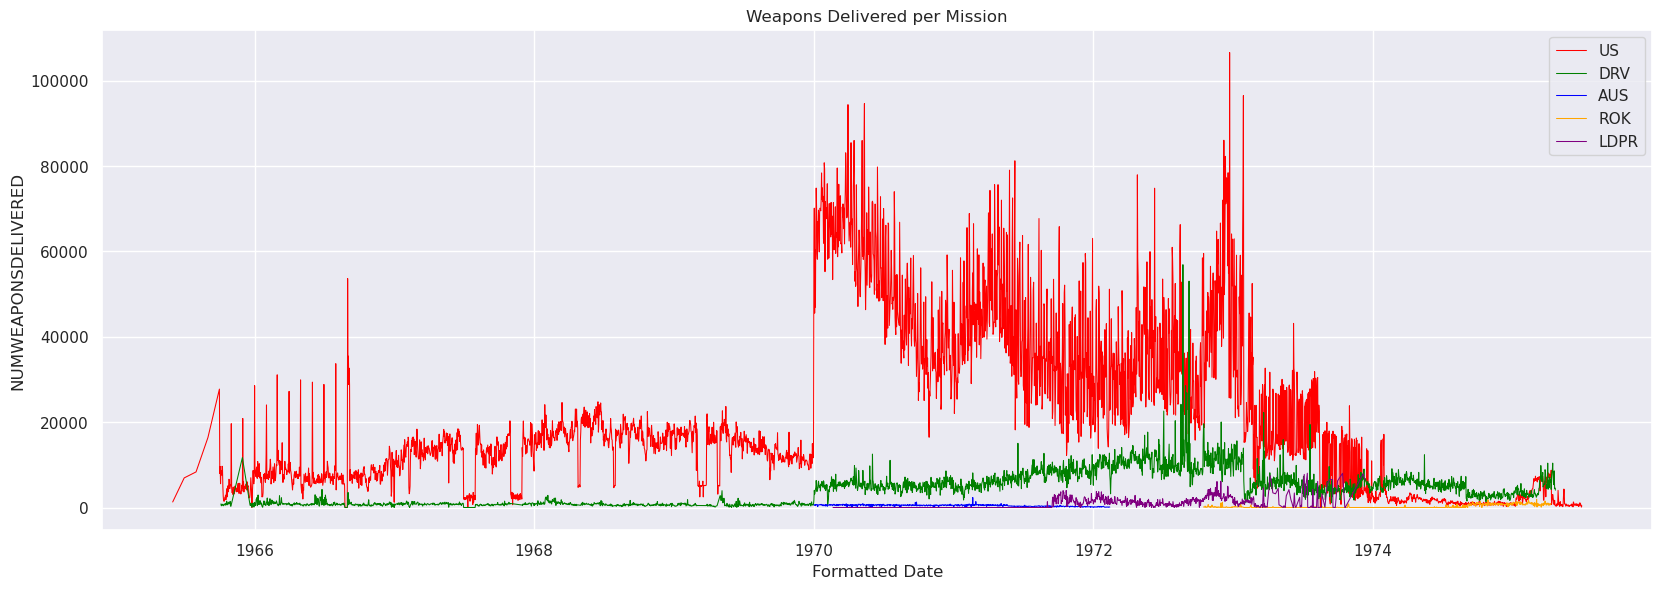

In [58]:
#collective involvement overtime

weapon = 'NUMWEAPONSDELIVERED'

sns.set(rc={'figure.figsize':(20,6.5)})
sns_plot = sns.lineplot(data=usa_time_df[weapon], color='red', linewidth=.75, label='US').set_title("Weapons Delivered per Mission")
sns_plot = sns.lineplot(data=drv_time_df[weapon], color='green', linewidth=.75, label='DRV')
sns_plot = sns.lineplot(data=aus_time_df[weapon], color='blue', linewidth=.75, label='AUS')
sns_plot = sns.lineplot(data=skorea_time_df[weapon], color='orange', linewidth=.75, label='ROK')
sns_plot = sns.lineplot(data=laos_time_df[weapon], color='purple', linewidth=.75, label="LDPR")


Time on Target (ToT) is time spent at strike location. 

This is in line with expectation with Vietnamisation in 1971, but surprising seeing that US troops still spend a large amount of time going forward.

Maybe the initial expectation is that ToT is spent purely for offensive missions (or 'strike) as posted above, but this could change considering some are tagged as alternative support-based missions/reconn/non-kinnetic. 

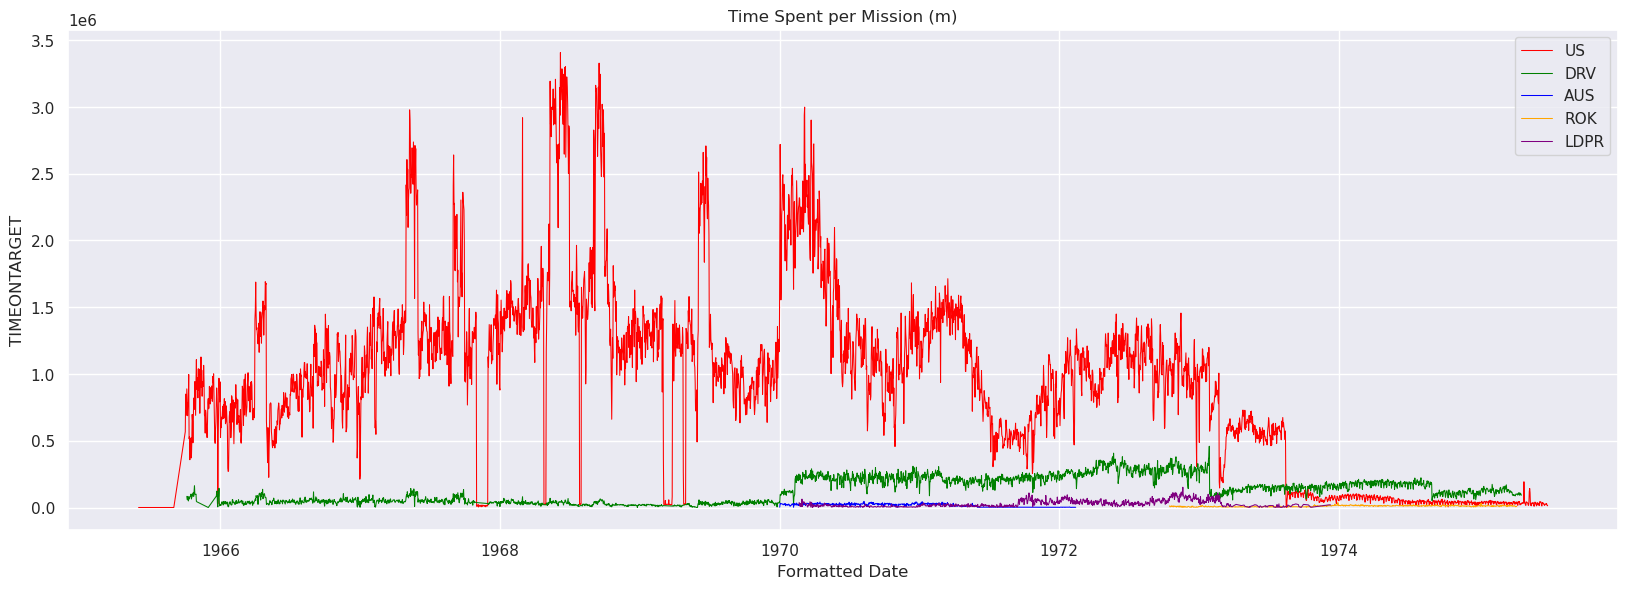

In [60]:
time_on_mission = 'TIMEONTARGET'

sns.set(rc={'figure.figsize':(20,6.5)})
sns_plot = sns.lineplot(data=usa_time_df[time_on_mission], color='red', linewidth=.75, label='US').set_title("Time Spent per Mission (m)")
sns_plot = sns.lineplot(data=drv_time_df[time_on_mission], color='green', linewidth=.75, label='DRV')
sns_plot = sns.lineplot(data=aus_time_df[time_on_mission], color='blue', linewidth=.75, label='AUS')
sns_plot = sns.lineplot(data=skorea_time_df[time_on_mission], color='orange', linewidth=.75, label='ROK')
sns_plot = sns.lineplot(data=laos_time_df[time_on_mission], color='purple', linewidth=.75, label="LDPR")


Flight time, again, in line with expectation around the 1971 point. Flight hours during Rolling Thunder is also in line with exp.

What is cauing the huge drop in US activity in 1971 if not offensive strikes? Interesting question to look into! 

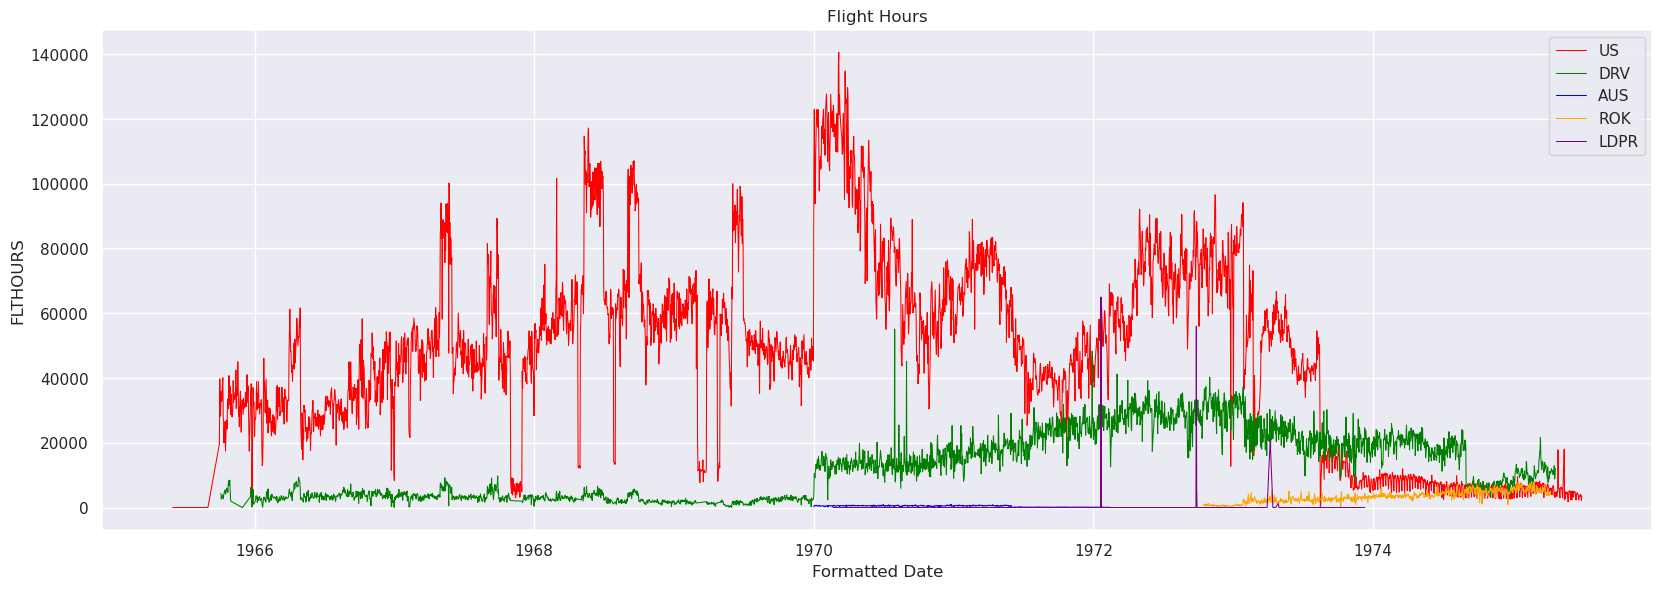

In [61]:
flight_hours = 'FLTHOURS'

sns.set(rc={'figure.figsize':(20,6.5)})
sns_plot = sns.lineplot(data=usa_time_df[flight_hours], color='red', linewidth=.75, label='US').set_title("Flight Hours")
sns_plot = sns.lineplot(data=drv_time_df[flight_hours], color='green', linewidth=.75, label='DRV')
sns_plot = sns.lineplot(data=aus_time_df[flight_hours], color='blue', linewidth=.75, label='AUS')
sns_plot = sns.lineplot(data=skorea_time_df[flight_hours], color='orange', linewidth=.75, label='ROK')
sns_plot = sns.lineplot(data=laos_time_df[flight_hours], color='purple', linewidth=.75, label="LDPR")


[STUDY ON THE IMPACT OF BOMBS IN VIETNAM](https://www.sciencedirect.com/science/article/abs/pii/S0304387810000817?via%3Dihub) 

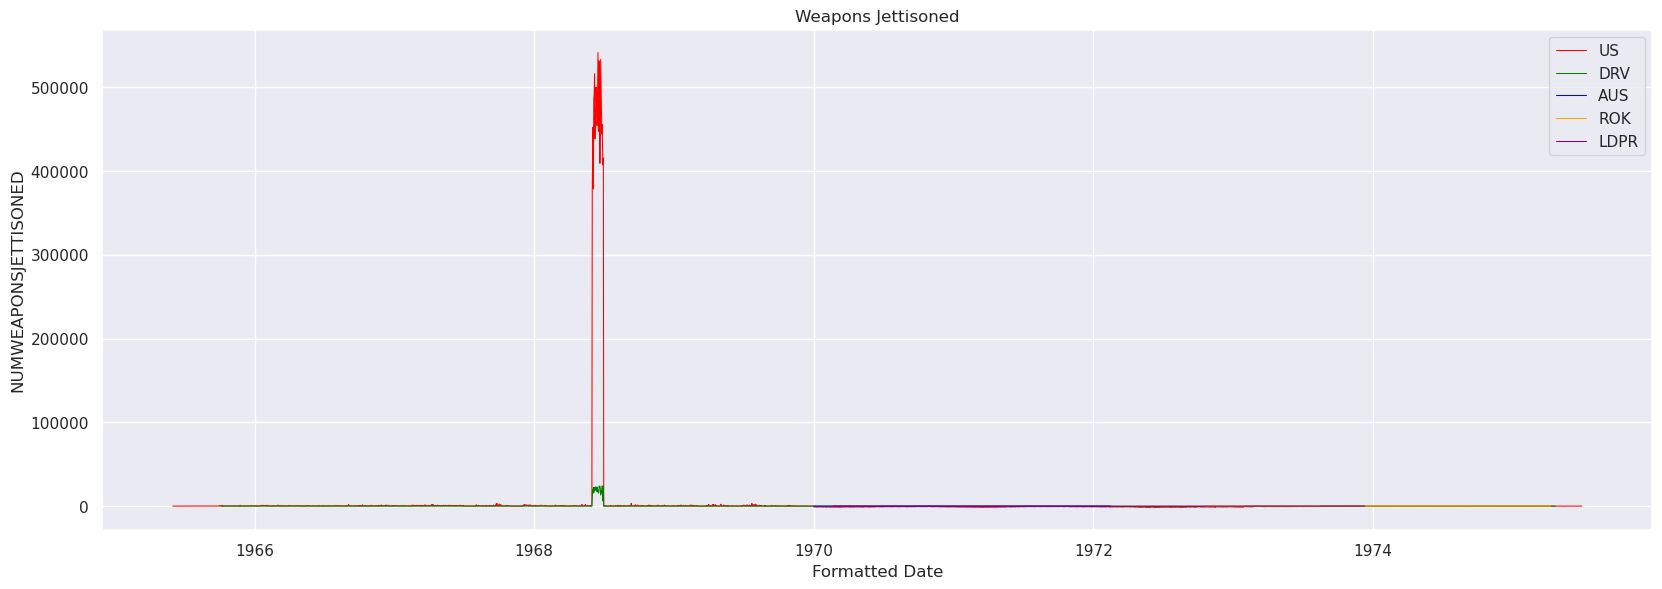

In [73]:
weapons_jet = 'NUMWEAPONSJETTISONED'

sns.set(rc={'figure.figsize':(20,6.5)})
sns_plot = sns.lineplot(data=usa_time_df[weapons_jet], color='red', linewidth=.75, label='US').set_title("Weapons Jettisoned")
sns_plot = sns.lineplot(data=drv_time_df[weapons_jet], color='green', linewidth=.75, label='DRV')
sns_plot = sns.lineplot(data=aus_time_df[weapons_jet], color='blue', linewidth=.75, label='AUS')
sns_plot = sns.lineplot(data=skorea_time_df[weapons_jet], color='orange', linewidth=.75, label='ROK')
sns_plot = sns.lineplot(data=laos_time_df[weapons_jet], color='purple', linewidth=.75, label="LDPR")

In [ ]:
ops_df['MSNDATE'].dtype #check 

In [ ]:
time_freq_df = ops_df.groupby(['MSNDATE']).sum()

time_freq_df

In [ ]:
ops_df